### K-Nearest Neighbor Algorithmus:

#### Parameter:  

dataset = (X, Y)  
mit X := Features  
und Y := Classes  

K := Hyperparameter für die nächsten k Nachbarn  
sample := Neuer Datenpunkt zum Klassifizieren 

#### Pseudo-Code:

kNN (dataset, K, sample):  
  - Bestimme von jedem Punkt $p \in dataset$ die Distanz, mit der geg. Distanzfunktion.
  - Bestimme die $K$ nächst gelegenen Nachbarn und bestimme die zugehörige Klasse von $sample$.  

In [71]:
import numpy as np


np.random.seed(42)

In [72]:
def generate_dataset():
    num_samples_class1 = 10
    num_samples_class2 = 6
    num_samples_class3 = 13
    cov = np.array([[1, 0], [0, 1]])
    data1 = np.random.multivariate_normal(
        np.array([0, 0]), cov, num_samples_class1
    )
    data2 = np.random.multivariate_normal(
        np.array([-10, 4]), cov, num_samples_class2
    )
    data3 = np.random.multivariate_normal(
        np.array([10, 10]), cov, num_samples_class3
    )
    data = np.concatenate((data1, data2, data3), axis=0)
    classes = np.array(
        [0 for i in range(num_samples_class1)]
        + [1 for i in range(num_samples_class2)]
        + [2 for i in range(num_samples_class3)]
    )
    return data, classes

In [73]:
x, y = generate_dataset()

In [74]:
print(f"x shape: {x.shape}")
print(f"y shape: {y.shape}")

print(f"x:\n{x[:4]}")
print(f"y:\n{y[:4]}")

x shape: (29, 2)
y shape: (29,)
x:
[[ 0.49671415 -0.1382643 ]
 [ 0.64768854  1.52302986]
 [-0.23415337 -0.23413696]
 [ 1.57921282  0.76743473]]
y:
[0 0 0 0]


In [75]:
import matplotlib.pyplot as plt


def plot_dataset(x, y):
    colors = ["red", "blue", "green"]
    for index, point in enumerate(x):
        plt.scatter(point[0], point[1], color=colors[y[index]])
    plt.show()

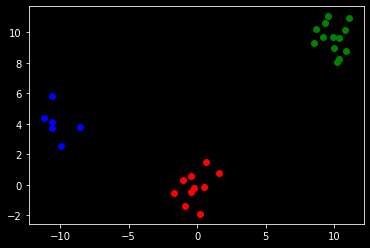

In [76]:
plot_dataset(x, y)

## KNN Implementation

In [77]:
class KNeighborClassifier:
    def __init__(self, n_neighbors: int = 5) -> None:
        self.n_neighbors = n_neighbors
        self.X: np.ndarray
        self.y: np.ndarray
        self.num_classes: int

    def _distance(self, p1: np.ndarray, p2: np.ndarray) -> np.ndarray:
        return np.linalg.norm(p1 - p2)

    def kneighbors(self, X: np.ndarray) -> np.ndarray:
        distances = np.array(
            [[self._distance(sample, x_i) for x_i in self.X] for sample in X]
        )
        sorted_distances_idxs = np.argsort(distances[:])
        kneighbors_idxs = sorted_distances_idxs[:, : self.n_neighbors]
        return kneighbors_idxs

    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        self.X = X
        self.y = y
        self.num_classes = len(np.unique(self.y))

    def _vote_class(self, kneighbors_idxs: np.ndarray) -> np.ndarray:
        votes = np.zeros(shape=(self.num_classes))
        neighbors_classes = self.y[kneighbors_idxs]
        for neighbor_class in neighbors_classes:
            votes[neighbor_class] += 1
        voted_class = np.argmax(votes)
        return voted_class

    def predict(self, X: np.ndarray) -> np.ndarray:
        kneighbors_idxs = self.kneighbors(X)
        y_pred = np.array(
            [
                self._vote_class(kneighbor_idxs)
                for kneighbor_idxs in kneighbors_idxs
            ]
        )
        return y_pred

    def score(self, X: np.ndarray, y: np.ndarray) -> np.ndarray:
        y_pred = self.predict(X)
        accuracy = np.mean(y_pred == y)
        return accuracy

In [78]:
x_test = np.array([[0.0, 4.0], [-5.0, 4.0], [7.3, 8.7]])
y_test = np.array([0, 1, 2])

clf = KNeighborClassifier(n_neighbors=3)
clf.fit(x, y)

accuracy = clf.score(x_test, y_test)
y_pred = clf.predict(x_test)

print(f"x_test:\n{x_test}")
print(f"y_test:\n{y_test}")
print(f"y_pred:\n{y_pred}")
print(f"Score: {accuracy}")

x_test:
[[ 0.   4. ]
 [-5.   4. ]
 [ 7.3  8.7]]
y_test:
[0 1 2]
y_pred:
[0 1 2]
Score: 1.0


In [79]:
def plot_knn_prediction(
    clf: KNeighborClassifier,
    X_samples: np.ndarray,
    y_pred: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
) -> None:
    colors = ["red", "blue", "green"]
    for index, point in enumerate(X):
        plt.scatter(point[0], point[1], color=colors[y[index]])
    neighbors_idxs = clf.kneighbors(X_samples)
    for index, point in enumerate(X_samples):
        neighbors_points = clf.X[neighbors_idxs][index]
        neighbors_classes = clf.y[neighbors_idxs][index]
        plt.scatter(
            point[0], point[1], color=colors[y_pred[index]], marker="*", s=120
        )
        for neighbor_point, neighbor_class in zip(
            neighbors_points, neighbors_classes
        ):
            plt.plot(
                (neighbor_point[0], point[0]),
                (neighbor_point[1], point[1]),
                color=colors[neighbor_class],
            )
    plt.show()

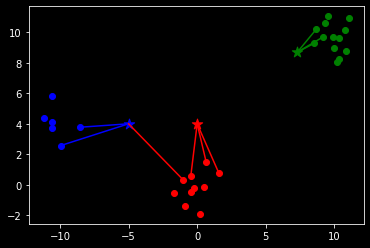

In [80]:
plot_knn_prediction(clf, x_test, y_pred, x, y)